In [1]:
from simulated_annealing.integer.solver import solve
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import statistics
import japanize_matplotlib 

In [2]:
def get_objective(N: int, seed=0):
    random.seed(seed)
    interaction = {}
    for i in range(0, N):
        for j in range(i, N):
            interaction[(i, j)] = random.uniform(-1, 1) / (N * N)
    return interaction


def make_range_dict(N: int, lower: int, upper: int):
    return {i: (lower, upper) for i in range(0, N)}

In [3]:
N = 50
interaction = get_objective(N, seed=0)
range_dict = make_range_dict(N, -10, 10)

In [4]:
result_list = {}
sweep_list = [10, 20, 40, 70, 100, 150, 200, 300]
for state_updater in ["METROPOLIS", "HEAT_BATH", "SUWA-TODO"]:
    result_list[state_updater] = []
    for sweep in tqdm(sweep_list):
        r = solve(
            interaction=interaction,
            range_dict=range_dict,
            num_sweeps=sweep,
            num_samples=100,
            state_updater=state_updater,
        )
        result_list[state_updater].append(r)

100%|██████████| 8/8 [00:57<00:00,  7.24s/it]


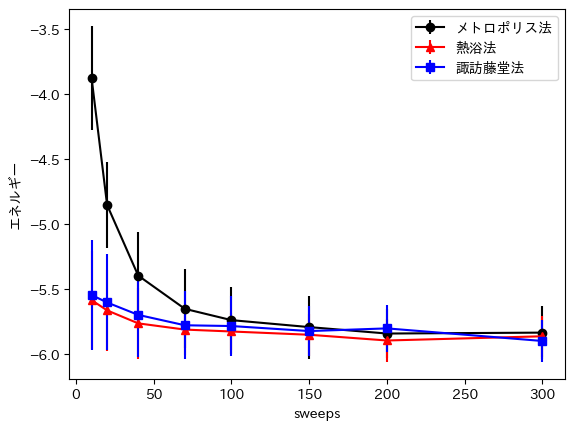

In [5]:
def e(results):
    return [statistics.mean(e.energy_list) for e in results]


def e_error(results):
    return [statistics.stdev(e.energy_list) for e in results]


met = result_list["METROPOLIS"]
hb = result_list["HEAT_BATH"]
st = result_list["SUWA-TODO"]

plt.errorbar(
    sweep_list, e(met), yerr=e_error(met), marker="o", color="black", label="メトロポリス法"
)
plt.errorbar(
    sweep_list, e(hb), yerr=e_error(hb), marker="^", color="red", label="熱浴法"
)
plt.errorbar(
    sweep_list, e(st), yerr=e_error(st), marker="s", color="blue", label="諏訪藤堂法"
)
plt.xlabel("sweeps")
plt.ylabel("エネルギー")
plt.legend()

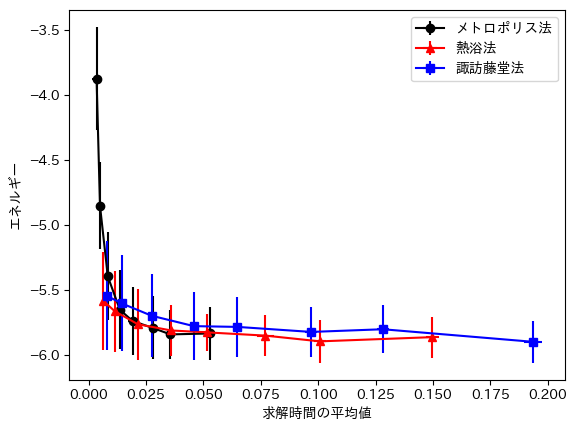

In [6]:
def t(result):
    return [statistics.mean(e.solving_time_list) for e in result]


def t_error(result):
    return [statistics.stdev(e.solving_time_list) for e in result]


plt.errorbar(
    t(met),
    e(met),
    xerr=t_error(met),
    yerr=e_error(met),
    marker="o",
    color="black",
    label="メトロポリス法",
)
plt.errorbar(
    t(hb),
    e(hb),
    xerr=t_error(hb),
    yerr=e_error(hb),
    marker="^",
    color="red",
    label="熱浴法",
)
plt.errorbar(
    t(st),
    e(st),
    xerr=t_error(st),
    yerr=e_error(st),
    marker="s",
    color="blue",
    label="諏訪藤堂法",
)
plt.xlabel("求解時間の平均値")
plt.ylabel("エネルギー")
plt.legend()